In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
# For MaxEnt

SyntaxError: invalid syntax (1933068620.py, line 1)

In [3]:
bug_name_list_full = ['T. sanguisuga','T. dimidiata','T. gerstaeckeri','T. protracta','T. longipennis','T. rubida','M. pallidipennis','T. barberi','T. mexicana','P. lecticularia','T. recurva','T. mazzottii','P. hirsuta','T. indictiva']
method_name_list = ["pixel_nobuffer_off","pixel_nobuffer_on","pixel_buffer_off","pixel_buffer_on","grid_nobuffer_off","grid_nobuffer_on","grid_buffer_off","grid_buffer_on"]
bug_name_list_c = ['San','Dim','Ger','Pro','Lon','Rub','Pal','Bar','Mex','Lec','Rec','Maz','Hir','Ind']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"

In [2]:
# bug_name_list_c = ['San','Ger','Dim','Pro','Lon','Rub','Pal','Bar','Mex','Lec','Maz','Hir','Rec','Ind','Phy','Neo']
# bug_name_list_full = ['T. sanguisuga','T. gerstaeckeri','T. dimidiata','T. protracta','T. longipennis','T. rubida','M. pallidipennis','T. barberi','T. mexicana',' P. lecticularia','T. mazzottii','P. hirsuta',' T. recurva',' T. indictiva','T. phyllosoma','T. neotomae']
# method_name_list = ["pixel_nobuffer_off","pixel_nobuffer_on","pixel_buffer_off","pixel_buffer_on","grid_nobuffer_off","grid_nobuffer_on","grid_buffer_off","grid_buffer_on"]
# label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
# bug_name_list = ["sanguisuga","gerstaeckeri","dimidiata","protracta","longipennis","rubida",'pallidipennis','barberi',"mexicana","lecticularia","mazzottii",'hirsuta',"recurva","indictiva",'phyllosoma',"neotomae"]
# output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"

Calculate the mean and std evaluation metric scores

In [2]:
def get_mean_svd(csv_saving_path,csv_result_path):
    this_csv_to_plot = pd.read_csv(csv_saving_path)
    this_csv_to_plot.keys
    mae_list = [this_csv_to_plot['mae'][0]]
    auc_list = [this_csv_to_plot['auc'][0]]
    bias_list = [this_csv_to_plot['bias'][0]]
    tss_list = [this_csv_to_plot['tss'][0]]
    threshold_list = [this_csv_to_plot['tss_threshold'][0]]
    count = 1
    while count < 10:
        this_mae_name = 'mae.'+str(count)
        this_auc_name = 'auc.'+str(count)
        this_bias_name = 'bias.'+str(count)
        this_tss_name = 'tss.'+str(count)
        this_threshold_name = 'tss_threshold.'+str(count)
        mae_list.append(this_csv_to_plot[this_mae_name][0])
        auc_list.append(this_csv_to_plot[this_auc_name][0])
        bias_list.append(this_csv_to_plot[this_bias_name][0])
        tss_list.append(this_csv_to_plot[this_tss_name][0])
        threshold_list.append(this_csv_to_plot[this_threshold_name][0])
        count+=1

    this_df = pd.DataFrame({'auc_mean': [np.mean(auc_list)], 'auc_std': [np.std(auc_list)],
                            'mae_mean': [np.mean(mae_list)], 'mae_std': [np.std(mae_list)],
                            'bias_mean': [np.mean(bias_list)], 'bias_std': [np.std(bias_list)],
                            'tss_mean': [np.mean(tss_list)], 'tss_std': [np.std(tss_list)],
                            'tss_threshold_mean': [np.mean(threshold_list)], 'tss_threshold_std': [np.std(threshold_list)],})
    this_df.to_csv(csv_result_path)
    return this_df

In [3]:
def generate_result_csv(output_dir,this_bug,method_name_list):
    this_bug_dict = {}
    for method_name in method_name_list:
        this_result_def = get_mean_svd(csv_saving_path=output_dir+method_name+"/"+this_bug+"/evaluate/cv_metric_results.csv",
                                    csv_result_path=output_dir+method_name+"/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")
        this_bug_dict[method_name] = this_result_def
    return this_bug_dict


In [6]:

bug_method_dict = {}
for this_bug in bug_name_list_c:
    this_bug_dict = generate_result_csv(output_dir,this_bug,method_name_list)
    bug_method_dict[this_bug] = this_bug_dict


In [7]:
# Initialize a list to hold all DataFrames
dataframes = []

for outer_key, nested_dict in bug_method_dict.items():
    for method_name, df in nested_dict.items():
        if isinstance(df, pd.DataFrame):  # Check if the value is a DataFrame
            df = df.copy()  # Make a copy of the DataFrame
            df['species'] = outer_key  # Add the outer key as a new column
            df['method_name'] = method_name  # Add the method name as a new column
            dataframes.append(df)  # Append the DataFrame to the list


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/figures/combined_mean_std_0126.csv', index=False)


In [8]:
combined_df = pd.read_csv(output_dir + '/figures/combined_mean_std_0126.csv')

Find the metric pair which has the lowest absolute Spearman correlation score 
(1) 

In [4]:
# for each bug, we produce correlation plot between each pair of mean values
def abs_correlation_all_cases(bug_array):
    this_fontsize = 20
    fig, ax = plt.subplots(figsize=(8,8))
    corr_df = bug_array.drop(["auc_std","mae_std","bias_std","tss_std","tss_threshold_mean","tss_threshold_std",'species','method_name'], axis=1)
    corr_df.rename(columns={"auc_mean": "AUC mean", "mae_mean": "MAE mean", "bias_mean": "Bias mean", "tss_mean": "TSS mean"},inplace=True)

    print(corr_df)
    coor_results = corr_df.corr(method="spearman")
    print(coor_results)


    ax_c = sns.heatmap(np.abs(coor_results),vmin=0, vmax=1,cbar=True,cmap='viridis',annot=True,annot_kws={"fontsize":this_fontsize})

    ax.tick_params(axis='x', labelsize= this_fontsize-5 )
    ax.tick_params(axis='y', labelsize= this_fontsize-5 )

    cax = ax_c.figure.axes[-1]
    cax.tick_params(labelsize=15)

    #plt.suptitle("Absolute Value of Spearman Correlation Coefficient",size = this_fontsize)
    
    plt.tight_layout() 
    plt.savefig(output_dir+"/figures/method_performance/maxent_abs_correlation_Spearman_0126.png",dpi=200,bbox_inches='tight')
    

     AUC mean  MAE mean  Bias mean  TSS mean
0    0.976091  0.111268   0.015894  0.887623
1    0.972513  0.116152   0.007990  0.882088
2    0.995677  0.043656   0.014310  0.953607
3    0.993839  0.046533   0.009554  0.947450
4    0.976507  0.075730  -0.016000  0.887413
..        ...       ...        ...       ...
107  0.966780  0.039122  -0.036470  0.874600
108  0.985520  0.018022  -0.014581  0.843800
109  0.958112  0.044463  -0.041779  0.869167
110  0.989748  0.012625  -0.009362  0.878233
111  0.969455  0.036226  -0.033698  0.900500

[112 rows x 4 columns]
           AUC mean  MAE mean  Bias mean  TSS mean
AUC mean   1.000000 -0.754203   0.734898  0.892567
MAE mean  -0.754203  1.000000  -0.256620 -0.540575
Bias mean  0.734898 -0.256620   1.000000  0.763770
TSS mean   0.892567 -0.540575   0.763770  1.000000


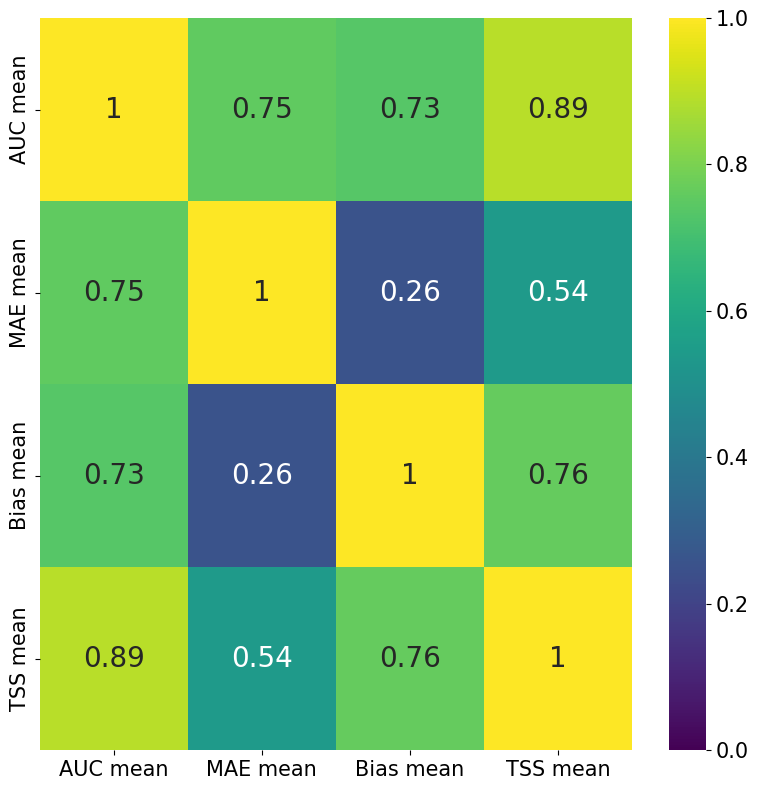

In [25]:
abs_correlation_all_cases(combined_df)

Find the Best Method with Bias and MAE 

In [5]:
def combined_standard_deviation(means, stds):
    n = len(means)
    combined_mean = np.mean(means)
    
    # Calculate the combined variance
    variance_within_groups = np.sum([std**2 for std in stds]) / n
    variance_between_groups = np.sum([(mean - combined_mean)**2 for mean in means]) / n
    
    combined_variance = variance_within_groups + variance_between_groups
    
    combined_std = np.sqrt(combined_variance)
    
    return combined_mean, combined_std

In [27]:
combined_df.keys()

Index(['auc_mean', 'auc_std', 'mae_mean', 'mae_std', 'bias_mean', 'bias_std',
       'tss_mean', 'tss_std', 'tss_threshold_mean', 'tss_threshold_std',
       'species', 'method_name'],
      dtype='object')

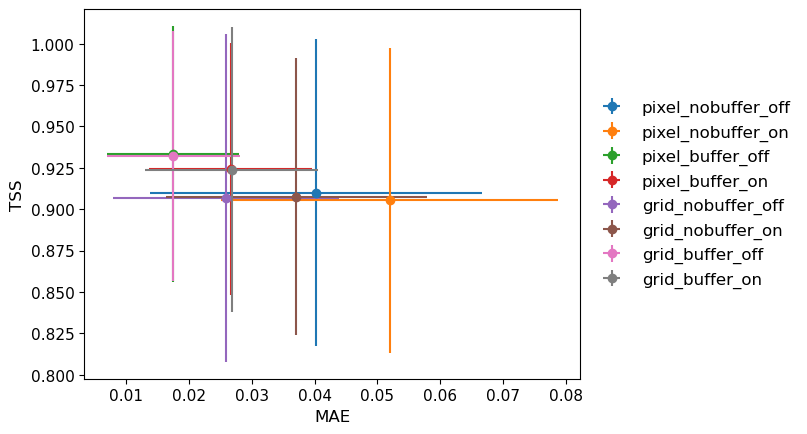

In [20]:
mae_bias_dict = {}
this_fontsize = 12
for this_method in method_name_list:
    this_method_values = combined_df[combined_df["method_name"]==this_method]
    mae_mean_list = this_method_values["mae_mean"]
    mae_std_list = this_method_values["mae_std"]
    bias_mean_list = this_method_values["tss_mean"]
    bias_std_list = this_method_values["tss_std"]
    mae_combined_mean, mae_combined_std = combined_standard_deviation(mae_mean_list, mae_std_list)
    bias_combined_mean, bias_combined_std = combined_standard_deviation(bias_mean_list, bias_std_list)
    plt.errorbar(mae_combined_mean, bias_combined_mean, xerr=mae_combined_std,yerr=bias_combined_std, fmt="o", label=this_method)
    mae_bias_dict[this_method] = {"mae_mean":mae_combined_mean,"mae_std":mae_combined_std,"tss_mean":bias_combined_mean,"tss_std":bias_combined_std}

plt.xlabel("MAE",fontsize=this_fontsize)
plt.ylabel("TSS",fontsize=this_fontsize)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False,fontsize=this_fontsize)
#plt.text(0.005,-0.035,"("+str(round(mae_bias_dict["grid_buffer_off"]["mae_mean"],4))+", "+str(round(mae_bias_dict["grid_buffer_off"]["bias_mean"],4))+")", fontsize=this_fontsize,color='tab:pink')
#plt.text(0.005,0.01,"("+str(round(mae_bias_dict["pixel_buffer_off"]["mae_mean"],4))+", "+str(round(mae_bias_dict["pixel_buffer_off"]["bias_mean"],4))+")", fontsize=this_fontsize,color='tab:green')
plt.tick_params(axis='x', labelsize= this_fontsize-1)
plt.tick_params(axis='y', labelsize= this_fontsize-1)
plt.savefig(output_dir+"/figures/method_performance/TSS_mae_best_method_0722.png",dpi=200,bbox_inches='tight')
    


In [22]:
print(np.mean(combined_df[combined_df["method_name"]=='pixel_buffer_off']["mae_mean"]))
print(np.mean(combined_df[combined_df["method_name"]=='pixel_buffer_off']["bias_mean"]))
print(np.mean(combined_df[combined_df["method_name"]=='grid_buffer_off']["mae_mean"]))
print(np.mean(combined_df[combined_df["method_name"]=='grid_buffer_off']["bias_mean"]))

0.017439468530805493
0.0006737722878925747
0.017472226770900618
0.000673610738900457


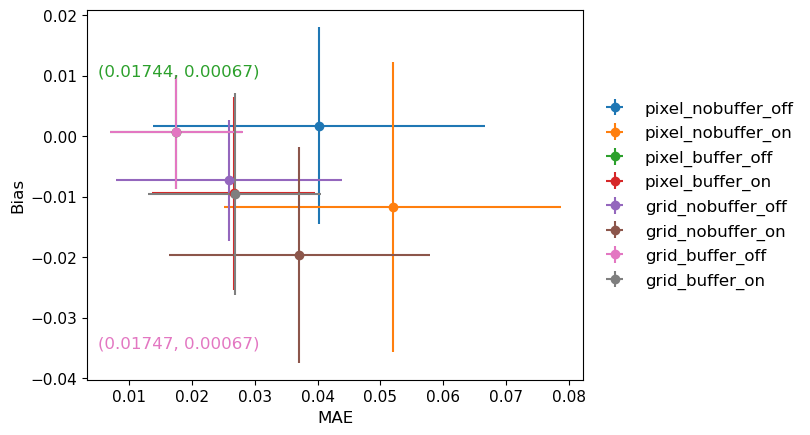

In [28]:
mae_bias_dict = {}
this_fontsize = 12
for this_method in method_name_list:
    this_method_values = combined_df[combined_df["method_name"]==this_method]
    mae_mean_list = this_method_values["mae_mean"]
    mae_std_list = this_method_values["mae_std"]
    bias_mean_list = this_method_values["bias_mean"]
    bias_std_list = this_method_values["bias_std"]
    mae_combined_mean, mae_combined_std = combined_standard_deviation(mae_mean_list, mae_std_list)
    bias_combined_mean, bias_combined_std = combined_standard_deviation(bias_mean_list, bias_std_list)
    plt.errorbar(mae_combined_mean, bias_combined_mean, xerr=mae_combined_std,yerr=bias_combined_std, fmt="o", label=this_method)
    mae_bias_dict[this_method] = {"mae_mean":mae_combined_mean,"mae_std":mae_combined_std,"bias_mean":bias_combined_mean,"bias_std":bias_combined_std}

plt.xlabel("MAE",fontsize=this_fontsize)
plt.ylabel("Bias",fontsize=this_fontsize)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False,fontsize=this_fontsize)
plt.text(0.005,-0.035,"("+str(round(mae_bias_dict["grid_buffer_off"]["mae_mean"],5))+", "+str(round(mae_bias_dict["grid_buffer_off"]["bias_mean"],5))+")", fontsize=this_fontsize,color='tab:pink')
plt.text(0.005,0.01,"("+str(round(mae_bias_dict["pixel_buffer_off"]["mae_mean"],5))+", "+str(round(mae_bias_dict["pixel_buffer_off"]["bias_mean"],5))+")", fontsize=this_fontsize,color='tab:green')
plt.tick_params(axis='x', labelsize= this_fontsize-1)
plt.tick_params(axis='y', labelsize= this_fontsize-1)
plt.savefig(output_dir+"/figures/method_performance/bias_mae_best_method.png",dpi=200,bbox_inches='tight')
    


For Random Forest

In [6]:
bug_name_list_full = ['T. sanguisuga','T. dimidiata','T. gerstaeckeri','T. protracta','T. longipennis','T. rubida','M. pallidipennis','T. barberi','T. mexicana','P. lecticularia','T. recurva','T. mazzottii','P. hirsuta','T. indictiva']
method_name_list = ["pixel_nobuffer_off","pixel_nobuffer_on","pixel_buffer_off","pixel_buffer_on","grid_nobuffer_off","grid_nobuffer_on","grid_buffer_off","grid_buffer_on"]
bug_name_list_c = ['San','Dim','Ger','Pro','Lon','Rub','Pal','Bar','Mex','Lec','Rec','Maz','Hir','Ind']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/rf/"

In [7]:
bug_method_dict = {}
for this_bug in bug_name_list_c:
    this_bug_dict = generate_result_csv(output_dir,this_bug,["pixel_buffer_off"])
    bug_method_dict[this_bug] = this_bug_dict

# Initialize a list to hold all DataFrames
dataframes = []

for outer_key, nested_dict in bug_method_dict.items():
    for method_name, df in nested_dict.items():
        if isinstance(df, pd.DataFrame):  # Check if the value is a DataFrame
            df = df.copy()  # Make a copy of the DataFrame
            df['species'] = outer_key  # Add the outer key as a new column
            df['method_name'] = method_name  # Add the method name as a new column
            dataframes.append(df)  # Append the DataFrame to the list


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/combined_mean_std.csv', index=False)
